<a href="https://colab.research.google.com/github/brendanpshea/computing_concepts_python/blob/main/IntroCS_08_CyberSecurity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# From Caesar's Cipher to AI - A Little History of Information Security
### Brendan Shea, PhD

The need to protect sensitive information has been a constant challenge. As communication methods and technologies have evolved, so too have the threats to the security of our data. In this chapter, we will explore the fascinating history of information security, from the early days of Julius Caesar's cipher to the cutting-edge techniques of artificial intelligence. More specifically, we'll consider how the CIA (Confidentiality, Ingretity, Availabilty) triad has served as a guiding framework throughout its evolution.

In this chapter, you'll learn to:

1.  Understand the CIA triad (Confidentiality, Integrity, Availability) and how it serves as a guiding framework for the development of information security measures.
2.  Trace the historical evolution of information security, from the Caesar cipher to the emergence of computer networks and the modern internet.
3.  Identify common types of network security threats, such as unauthorized access, malware, denial of service attacks, data interception, and social engineering, and provide historical examples of each.
4.  Explain the role of cryptography in securing communication, including symmetric encryption, asymmetric encryption (public key cryptography), hashing, and digital signatures.
5.  Implement a simple hash function and understand the properties and limitations of hash algorithms.
6.  Recognize the different types of threat actors interested in personal data.
7. Apply practical methods for protecting information, such as being mindful of hardware and software sources, using strong passwords and two-factor authentication, being cautious of phishing attempts, encrypting data and communications, and regularly backing up data.

In [ ]:
## Video Lecture
from IPython.display import YouTubeVideo
YouTubeVideo('082LY5CPaWw', width=800, height=500)

## The CIA Triad
The **CIA triad** is a fundamental concept in information security that defines the three key principles of protecting data: Confidentiality, Integrity, and Availability. These principles form the foundation of information security and guide the development and implementation of security measures. While all three aspects are crucial, there is often a tension between them, as focusing too much on one principle can sometimes compromise the others.

- **Confidentiality** ensures that data is accessible only to authorized parties. A simple example is your social media account. When you create a password for your account, you ensure that only you can access your private messages and posts. This is confidentiality in action. However, if you choose a very complex password that you can't remember, you might end up locking yourself out of your own account, which affects availability.
- **Integrity** maintains the accuracy and consistency of data throughout its lifecycle. Imagine you're working on a school project with your classmates using a shared online document. You want to make sure that the content remains accurate and consistent, even as multiple people make changes. This is where version control and track changes come in handy, as they help maintain the integrity of the document. However, if you set very strict editing permissions to ensure integrity, it might make it harder for your classmates to contribute to the project, affecting availability.
- **Availability** guarantees that data and systems are accessible and operational when needed by authorized users. A simple example is your school's online learning platform. You want to be able to access your course materials, submit assignments, and participate in discussions whenever you need to. The school ensures availability by having reliable servers and backup systems. However, if the school focuses too much on availability and grants access to everyone without proper authentication, it could compromise the confidentiality of sensitive information, such as grades or personal details.

In practice, achieving a perfect balance among the three principles of the CIA triad can be challenging. Measures taken to strengthen one aspect may have unintended consequences on the others. For instance, if you use **two-factor authentication (2FA)** to enhance the confidentiality of your online banking account, it might take a bit longer to log in, slightly affecting availability.

Information security professionals must carefully consider the specific needs and priorities of their organization and find the right balance among confidentiality, integrity, and availability. They do this by assessing risks, implementing various security measures, and regularly reviewing and adjusting their security strategy.

### Graphic: The CIA Triad
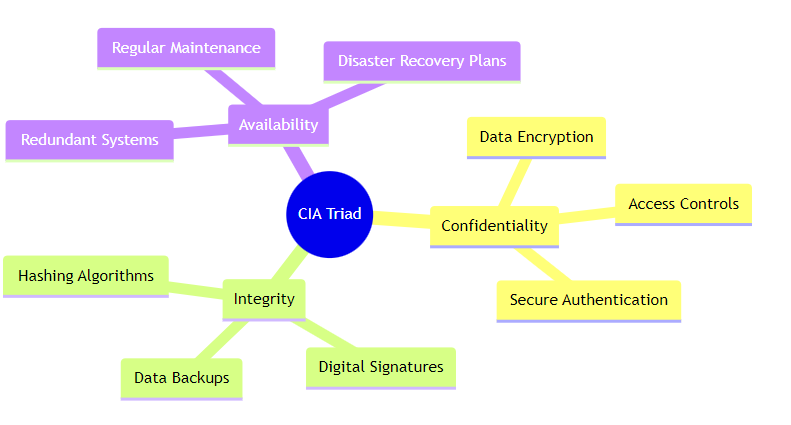

## The Caesar Cipher
Imagine you're Julius Caesar, the mighty ruler of the Roman Empire, and you need to send a confidential message to your generals on the battlefield. You know that your enemies are intercepting your communications, and you can't risk your battle plans falling into the wrong hands. What do you do? This is where the Caesar cipher comes into play.

Julius Caesar's cipher, also known as the **Caesar cipher** or shift cipher, is one of the earliest known examples of encryption techniques. It contributed to the early development of confidentiality in information security by demonstrating the basic principle of substitution ciphers and highlighting the need for secure communication. How Caesar's cipher works:

1.  Each letter in the original message (plaintext) is replaced by a letter a fixed number of positions down the alphabet.
2.  For example, with a shift of 3, 'A' would become 'D', 'B' would become 'E', and so on.
3.  The resulting encrypted message (ciphertext) would be gibberish to anyone who doesn't know the specific shift number used.
4.  To decrypt the message, the recipient would need to know the shift number and apply it in reverse.

Here's a simple Python code snippet that demonstrates the Caesar cipher:

In [ ]:
def caesar_cipher(text, shift):
    result = ""
    for char in text:
        # Check if the character is a letter
        if char.isalpha():
            # Determine the ASCII offset based on the case of the character
            # ASCII offset for uppercase letters is 65 (A)
            # ASCII offset for lowercase letters is 97 (a)
            ascii_offset = 65 if char.isupper() else 97

            # Apply the Caesar cipher shift to the character
            # ord(char) converts the character to its ASCII code
            # Subtracting the ASCII offset maps the character to the range [0, 25]
            # Adding the shift and taking the modulo 26 applies the Caesar cipher shift
            # Adding the ASCII offset back maps the result to the original ASCII range
            # chr() converts the ASCII code back to a character
            result += chr((ord(char) - ascii_offset + shift) % 26 + ascii_offset)
        else:
            # If the character is not a letter, add it to the result unchanged
            result += char

    return result

In [ ]:
# Test code
plaintext = "It was the best of times. It was the worst of times."
print("Original message:",plaintext)

shift = 3
ciphertext = caesar_cipher(plaintext, shift)
print("Ciphertext:", ciphertext)

# We can now decrypt using the same shift (but backwards)
decrypted_text = caesar_cipher(ciphertext, -shift)
print("Decrpyted using same key:", decrypted_text)

Original message: It was the best of times. It was the worst of times.
Ciphertext: Lw zdv wkh ehvw ri wlphv. Lw zdv wkh zruvw ri wlphv.
Decrpyted using same key: It was the best of times. It was the worst of times.


Caesar's ciper was important for a number of reasons:

1. The cipher was used by Julius Caesar (and the Roman military) to protect sensitive military and political correspondence, demonstrating the early recognition of the need for confidentiality in communication.
2. Although the Caesar cipher is a simple substitution cipher and can be easily broken with modern techniques, it laid the foundation for more complex encryption methods that followed.
3. The cipher introduced the concept of **symmetric encrpytion**, where the shift number acts as a secret key shared between the sender and the recipient. (In symmetric encryption, *both people share the same key--hence the "symmetry*.
4. It also highlighted the importance of keeping the encryption method and the key secret, as the security of the cipher relies on the secrecy of the shift number.

Caesar's cipher also had some notable weaknesses, though, which we will explore in the next section.

## Cracking the Caesar Cipher: An Introduction to Encryption Attacks

While Julius Caesar's cipher was a groundbreaking invention in its time, it is now considered a relatively weak form of encryption. In fact, cracking the Caesar cipher is often used as an educational exercise to introduce students to the basics of cryptanalysis, the study of breaking encryption systems. By understanding how the Caesar cipher can be cracked, we can gain valuable insights into the general ways in which encryption is attacked and the importance of using strong, modern encryption methods.

- A **brute-force** attack involves trying every possible key or shift value until the correct one is found. In the case of the Caesar cipher, there are only 25 possible shift values (assuming the English alphabet). An attacker can easily try all 25 shifts and determine the correct one based on the readability of the decrypted text. This highlights the importance of using encryption methods with large key spaces to make brute-force attacks impractical.
- **Frequency analysis** exploits the fact that certain letters and letter combinations appear more frequently in a given language. In English, for example, the letter 'e' is the most common, while 'z' is one of the least common. By analyzing the frequency distribution of the letters in the ciphertext and comparing it to the known frequency distribution of the language, an attacker can make educated guesses about the original plaintext. This technique is particularly effective against simple substitution ciphers like the Caesar cipher.
- In a **known plaintext attack**, the attacker has access to both the plaintext and its corresponding ciphertext. This can happen when the same message is encrypted multiple times with the same key or when the attacker knows or can guess part of the plaintext. With the Caesar cipher, if an attacker knows that the word "the" appears in the plaintext, they can look for the corresponding shifted letters in the ciphertext and deduce the shift value. This emphasizes the importance of using unique keys for each message and avoiding the use of common or predictable phrases.
- In a **ciphertext-only attack**, the attacker only has access to the encrypted message. While this may seem like a daunting task, the Caesar cipher is vulnerable to this type of attack due to its simplicity. An attacker can perform frequency analysis or try common shift values (like 1, 2, or 3) to crack the cipher. Modern encryption methods, like the Advanced Encryption Standard (AES), are designed to withstand ciphertext-only attacks by using complex mathematical algorithms and large key sizes.

Here's a simple Python script that demonstrates a brute-force attack on the Caesar cipher:

In [ ]:
ciphertext = "Dwwdfn dw gdzq!"
for shift in range(26):
    plaintext = caesar_cipher(ciphertext, shift)
    print(f"Shift {shift}: {plaintext}")

Shift 0: Dwwdfn dw gdzq!
Shift 1: Exxego ex hear!
Shift 2: Fyyfhp fy ifbs!
Shift 3: Gzzgiq gz jgct!
Shift 4: Haahjr ha khdu!
Shift 5: Ibbiks ib liev!
Shift 6: Jccjlt jc mjfw!
Shift 7: Kddkmu kd nkgx!
Shift 8: Leelnv le olhy!
Shift 9: Mffmow mf pmiz!
Shift 10: Nggnpx ng qnja!
Shift 11: Ohhoqy oh rokb!
Shift 12: Piiprz pi splc!
Shift 13: Qjjqsa qj tqmd!
Shift 14: Rkkrtb rk urne!
Shift 15: Sllsuc sl vsof!
Shift 16: Tmmtvd tm wtpg!
Shift 17: Unnuwe un xuqh!
Shift 18: Voovxf vo yvri!
Shift 19: Wppwyg wp zwsj!
Shift 20: Xqqxzh xq axtk!
Shift 21: Yrryai yr byul!
Shift 22: Zsszbj zs czvm!
Shift 23: Attack at dawn!
Shift 24: Buubdl bu ebxo!
Shift 25: Cvvcem cv fcyp!


If you look closely, you'll see that one of the 26 possible options yields the plaintext.

## From Caesar to the Telegraph: Early Threats to Information Security

Having explored the groundbreaking Caesar cipher and the methods used to crack it, let's now delve into the broader landscape of information security threats in the era before the telegraph. While the Caesar cipher addressed confidentiality, the early threats to information security encompassed all aspects of the CIA triad: Confidentiality, Integrity, and Availability.

- In ancient times, the primary threat to confidentiality was the **physical theft or tampering** of written documents. Sensitive information, such as military strategies and diplomatic correspondence, was vulnerable to unauthorized access by adversaries who could steal or intercept the documents. To mitigate this threat and ensure confidentiality, important documents were often sealed, and trusted messengers were employed to deliver them securely. This early form of confidentiality protection bears striking similarities to modern encryption techniques, such as the use of virtual private networks (VPNs) and secure sockets layer (SSL) certificates, which aim to protect sensitive data from unauthorized access as it traverses digital networks.

- Integrity, the accuracy and consistency of information, was also at risk in the early days of information security. Adversaries could alter or forge documents to mislead or deceive the intended recipients. To counter this threat, measures such as unique seals, signatures, and other forms of authentication were used to verify the integrity of the documents and detect any tampering. In the digital age, ensuring data integrity remains a critical concern. Modern techniques, such as **digital signatures**, checksums, and blockchain technology, serve as the contemporary counterparts to the seals and signatures of ancient times. These methods help detect and prevent unauthorized modifications to digital assets, ensuring the trustworthiness and reliability of information.

- Availability, the third pillar of the CIA triad, was threatened by factors such as the loss, destruction, or interception of documents. To ensure the availability of crucial information, multiple copies of important documents were often created and stored in secure locations. This **redundancy** helped prevent the total loss of information in case of accidents, disasters, or enemy action. In the modern digital landscape, availability is safeguarded through techniques such as data backup and recovery, distributed storage systems, and cloud computing. These approaches mirror the ancient practice of creating multiple copies and storing them securely, ensuring that critical information remains accessible even in the face of disruptions or attacks.

As encryption methods like the Caesar cipher and other substitution ciphers were developed to protect confidentiality, a new threat emerged: cryptanalysis and code breaking. Adversaries would attempt to crack the codes and decipher the encrypted messages to gain access to sensitive information. This led to an ongoing race between code makers and code breakers, with each side constantly developing new techniques to outsmart the other.

## From the Telegraph to the Enigma: The Evolving Landscape of Information Security in the Pre-Computing Era

The invention of the telegraph in the 1830s marked a significant milestone in the history of communication and information security. As electronic communication began to replace physical messengers, new threats emerged, necessitating the development of innovative security measures. This section explores the evolving landscape of information security from the advent of the telegraph to the famous Enigma machine, highlighting the interplay between technological advancements and the ongoing battle to protect sensitive information.

The telegraph revolutionized long-distance communication, enabling messages to be transmitted rapidly across vast distances. However, this new technology also introduced vulnerabilities that could be exploited by adversaries. One of the primary threats was the interception of telegraph messages. Malicious actors could tap into telegraph lines, eavesdropping on confidential communications and compromising the confidentiality of sensitive information. In response, cryptographic techniques, such as the **Playfair cipher** and the **Vigenère cipher**, were developed to encrypt telegraph messages, making them unreadable to unauthorized parties.

As the use of the telegraph expanded, so did the need for secure key exchange. In 1883, Auguste Kerckhoffs, a Dutch linguist and cryptographer, introduced **Kerckhoffs's principle**, which states that the security of a cryptographic system should depend on the secrecy of the key, not the secrecy of the algorithm. This principle laid the foundation for modern cryptography and emphasized the importance of robust key management practices. Kerckhoffs's work also highlighted the need for encryption algorithms to be thoroughly studied and tested to ensure their security against cryptanalytic attacks.

The outbreak of World War I in 1914 brought about a new era of military communications and espionage. The widespread use of the telegraph and radio communication made the protection of sensitive military information a top priority. One notable figure during this period was Gilbert Vernam, an American engineer who invented the **Vernam cipher**, also known as the **one-time pad**. The one-time pad is a cryptographic system that uses a unique key for each message, providing unbreakable security if used correctly. Vernam's invention was a significant milestone in the development of secure communication, and variations of the one-time pad are still used in certain high-security applications today.

The interwar period saw the rise of mechanical encryption devices, such as the **Enigma machine**. Invented by German engineer Arthur Scherbius in the early 1920s, the Enigma machine became infamous during World War II as the primary encryption device used by Nazi Germany. The Enigma machine employed a complex system of rotors and plugboards to encrypt messages, making it incredibly difficult to crack. The breaking of the Enigma code by Allied cryptographers, including Alan Turing and the team at Bletchley Park, played a crucial role in the outcome of the war and underscored the importance of cryptanalysis in the field of information security.

The pre-computing era also witnessed the emergence of new threats, such as the **insider threat** and **social engineering**. In 1943, René Carmille, a French computer scientist and cryptologist, sabotaged the Vichy government's efforts to identify Jewish citizens by subtly altering the punch cards used in the census machines. Carmille's act of sabotage highlighted the potential for insiders to undermine the integrity and confidentiality of information systems. Social engineering techniques, such as impersonation and manipulation, were also used by spies and infiltrators to gather sensitive information, emphasizing the need for security awareness and training.

As the world moved closer to the computing age, the lessons learned from the pre-computing era continued to shape the development of information security. The principles of cryptography, key management, and the importance of human factors in security laid the groundwork for the challenges that would arise with the advent of computer networks and the digital age. By understanding the historical context and the evolving nature of threats, information security professionals can better appreciate the significance of the tools and techniques developed during this period and their relevance to contemporary security practices.

### The Vigenère Cipher: A Milestone in Cryptographic History

The Vigenère cipher, invented by Italian cryptographer Giovan Battista Bellaso in the 16th century and later misattributed to French diplomat Blaise de Vigenère, marked a significant advancement in the field of cryptography. This polyalphabetic substitution cipher addressed the weaknesses of simple substitution ciphers, such as the Caesar cipher, by using a keyword (rather than a single number) to encrypt the plaintext.

The Vigenère cipher works as follows:

1.  A keyword is chosen and repeated to match the length of the plaintext.
2.  Each letter of the plaintext is shifted based on the corresponding letter of the keyword, using a tabula recta (Vigenère square). In essence, each letter of the keyword is used to create a unique"Caeaser cipher".
3.  The resulting ciphertext is much more resistant to frequency analysis and brute force than simple substitution ciphers. This is, in large part, because of increased **key length**. A simple Caesar Cipher had only 26 possible keys, while there are 26^6 = 308,915,776 possible values for a 6-letter keyword (like "SECRET" or "CIPHER").

Here's a Python implementation of the Vigenère cipher

In [ ]:
def vigenere_cipher(text, key, decrypt=False):
    result = ""
    key_length = len(key)
    for i, char in enumerate(text):
        # Check if the character is a letter
        if char.isalpha():
            # Calculate the shift based on the corresponding character in the key
            # ord(key[i % key_length].upper()) converts the key character to its ASCII code (A-Z)
            # Subtracting 65 maps the key character to the range [0, 25]
            shift = ord(key[i % key_length].upper()) - 65

            # If decrypting, negate the shift value
            if decrypt:
                shift = -shift

            # Apply the Caesar cipher shift to the character using the calculated shift
            result += caesar_cipher(char, shift)
        else:
            # If the character is not a letter, add it to the result unchanged
            result += char

    return result


In [ ]:
# Test code
plaintext = "It was the best of times. It was the worst of times."
key = "SECRET"

print("Original message:")
print(plaintext)

ciphertext = vigenere_cipher(plaintext, key)
print("\nEncrypted message:")
print(ciphertext)

decrypted_text = vigenere_cipher(ciphertext, key, decrypt=True)
print("\nDecrypted message:")
print(decrypted_text)

Original message:
It was the best of times. It was the worst of times.

Encrypted message:
Ax nel xjv uwwv sy xkdil. Kk psw klx aqiwm sh xbeiu.

Decrypted message:
It was the best of times. It was the worst of times.


The Vigenère cipher was considered unbreakable for centuries, earning it the nickname "le chiffre indéchiffrable" (the indecipherable cipher). However, in the 19th century, British mathematician Charles Babbage and later, Prussian colonel Friedrich Kasiski, developed methods to crack the Vigenère cipher.

The **Kasiski examination**, a method for breaking the Vigenère cipher, involves the following steps:

1.  Find repeated sequences of characters (polygrams) in the ciphertext.
2.  Calculate the distances between these repeated polygrams.
3.  Determine the greatest common divisor (GCD) of these distances, which is likely the length of the keyword.
4.  Divide the ciphertext into groups based on the keyword length and perform frequency analysis (see the section on Caesar above) on each group to determine the keyword.

The cracking of the Vigenère cipher demonstrated that even complex encryption methods could be vulnerable to cryptanalysis. This realization led to the development of more sophisticated encryption techniques and the ongoing race between code makers and code breakers. The lessons learned from the Vigenère cipher continue to influence modern cryptography, emphasizing the importance of key management, algorithm design, and the constant need for innovation in the face of evolving threats.

## Discussion Questions
1. How does the CIA triad help guide the development of information security measures? Can you think of real-life examples where one principle might be prioritized over the others?
2. Imagine you are modern day president, and send a secret message to your generals. However, you cannot use computers. How would you encrypt your message? What are the potential weaknesses of this method?
3. Why is it important to have a large key space in encryption methods? How does this relate to the vulnerability of the Caesar cipher to brute-force attacks?
4. In what ways can frequency analysis be used to crack simple substitution ciphers like the Caesar cipher? How might you make a cipher more resistant to frequency analysis?
5. Discuss the importance of using unique keys for each message and avoiding common or predictable phrases. What are some strategies for generating strong, unique keys?

## Answers
1.

2.

3.

4.

5.

In [ ]:
## Lecture Part 2
from IPython.display import YouTubeVideo
YouTubeVideo('IcG7nlk70vc', width=800, height=500)

## The Emergence of Computer Networks: A New Era of Connectivity and Vulnerability

In the 1960s, a quiet revolution began that would forever change the way we communicate and share information. The development of computer networks marked the dawn of a new era, one filled with the promise of unprecedented connectivity and the challenges of previously unknown vulnerabilities. As the world embraced the digital age, pioneers like Paul Baran and Donald Davies laid the foundation for modern computer networks with their groundbreaking work on packet switching.

**Packet switching**, a method of transmitting data by breaking it into smaller units called packets, revolutionized data communication. Each packet, containing a portion of the data along with addressing and control information, could be routed independently through the network. This innovative approach to data transmission paved the way for the development of the Advanced Research Projects Agency Network (ARPANET) in 1969, one of the first operational packet-switching networks and a precursor to the Internet.

As we discussed earlier, a common model for understanding networks is the four layer model:

- The **Application Layer** This layer is closest to the end-user and includes protocols such as HTTP (web browsing), FTP (file transfer), and SMTP (email). It is responsible for providing services to applications and ensuring effective communication between them.
- The **transport layer** ensures reliable data delivery between applications running on different computers. The most common protocols in this layer are TCP (Transmission Control Protocol) and UDP (User Datagram Protocol). TCP provides error-free, sequential transmission of data, while UDP offers faster but less reliable data transfer.
- The **Internet layer** is responsible for addressing and routing packets across multiple networks. The Internet Protocol (IP) operates at this layer, providing logical addressing and enabling data to be sent from source to destination.
- The **Network Access Layer** is the lowest layer in the TCP/IP model, the network access layer, encompasses the physical and data link protocols that govern the transmission of data over network media, such as Ethernet or Wi-Fi.

### Threats to Networks
As computer networks have evolved, so have the security threats that target them. Here are five common types of network security threats, along with historical examples that illustrate their impact:

#### Unauthorized Access and Hacking
Unauthorized access and hacking involve gaining access to a network or system without permission. Attackers may exploit vulnerabilities in software, hardware, or configurations to bypass security controls and gain unauthorized access. Once inside, they can steal sensitive data, install malware, or manipulate the system for their own purposes.
- In 2010, the Stuxnet worm targeted industrial control systems, specifically those used in Iran's nuclear program. The worm exploited vulnerabilities in Windows and Siemens PLCs to gain unauthorized access to the systems and cause physical damage to centrifuges, setting back Iran's nuclear ambitions.
- In 2017, the Equifax data breach exposed the personal information of nearly 150 million people due to a vulnerability in a web application. Hackers exploited this vulnerability to gain unauthorized access to Equifax's systems and steal sensitive data, including Social Security numbers and credit card information.

### Malware and Viruses
**Malware (malicious software)** and **viruses** are programs designed to harm, disrupt, or gain unauthorized access to a computer system. They can spread through email attachments, downloaded files, or compromised websites. Once installed, malware can steal data, encrypt files for ransom, or use the infected system to launch attacks on other networks.

-  In 1988, the Morris Worm infected around 10% of the 60,000 computers connected to the early Internet. Created by Robert Tappan Morris, a graduate student at Cornell University, the worm exploited vulnerabilities in Unix systems and caused significant disruption, highlighting the need for improved network security.
- In 2017, the WannaCry ransomware attack affected more than 200,000 computers across 150 countries. The malware exploited a vulnerability in the Windows operating system, encrypting files and demanding a ransom payment in Bitcoin. The attack caused significant disruption to businesses, hospitals, and government agencies worldwide.

#### Denial of Service (DoS) Attacks
DoS attacks aim to make a network or system unavailable to its intended users by overwhelming it with traffic or exploiting vulnerabilities that cause it to crash. **Distributed Denial of Service (DDoS)** attacks use multiple compromised systems to flood the target with traffic, making it even more difficult to defend against.

-   In 2007, Estonia suffered a series of DDoS attacks that targeted government, media, and financial institutions. The attacks, which were attributed to Russian hackers, highlighted the potential for cyberattacks to disrupt critical infrastructure and national security.
-  In 2016, the Mirai botnet, composed of hundreds of thousands of compromised IoT devices, launched massive DDoS attacks against the DNS provider Dyn. The attack disrupted major websites and services, including Twitter, Netflix, and Reddit, demonstrating the vulnerability of the Internet of Things (IoT) to malicious actors.

#### Data Interception and Eavesdropping
Data interception and eavesdropping involve the unauthorized monitoring, capturing, or stealing of data as it is transmitted over a network. Attackers can use techniques like packet sniffing, man-in-the-middle attacks, or compromising network infrastructure to intercept sensitive data, such as login credentials, financial information, or confidential communications.

-   In 2013, the Edward Snowden revelations exposed the extent of global surveillance programs conducted by the U.S. National Security Agency (NSA) and other intelligence agencies. These programs involved the interception and collection of vast amounts of internet and telephone data, raising concerns about privacy and the security of online communications.
-   In 2014, the Heartbleed vulnerability in the OpenSSL cryptographic library was discovered. The vulnerability allowed attackers to intercept and steal sensitive data, including encryption keys and login credentials, from affected servers. The widespread use of OpenSSL meant that the vulnerability affected a significant portion of the internet, leading to a global effort to patch and mitigate the risk.

#### Social Engineering and Phishing
**Social engineering** and **phishing** attacks exploit human psychology to trick individuals into revealing sensitive information or taking actions that compromise security. Phishing emails, for example, may appear to come from a legitimate source and lure the recipient into clicking on a malicious link or providing their login credentials.

-   In 2016, the Democratic National Committee (DNC) suffered a high-profile data breach that was attributed to Russian hackers. The attackers used spear-phishing emails to trick DNC staff into revealing their login credentials, allowing the hackers to gain access to the organization's email servers and steal confidential information.
-  In 2020, the Twitter accounts of high-profile individuals, including Barack Obama, Elon Musk, and Bill Gates, were compromised in a coordinated social engineering attack. The attackers used a combination of phishing and social engineering tactics to gain access to Twitter's internal tools, allowing them to post fraudulent tweets from the compromised accounts.

## Public Key Cryptography and the Internet: Securing Communication in the Digital Age

As we have seen throughout the history of information security, the need for secure communication has been a constant challenge. From the early days of the Caesar cipher to the emergence of computer networks, protecting the confidentiality, integrity, and authenticity of information has been a critical concern. With the growth of the internet and the increasing reliance on digital communication, this challenge has become even more complex. In this section, we will explore how a combination of symmetric encryption, asymmetric encryption, and hashing forms the foundation of modern internet security.

Imagine you want to send a sensitive message to a friend over the internet. You want to ensure that:

1.  The message remains confidential and cannot be read by anyone else.
2.  The message is not altered during transmission.
3.  Your friend can be confident that the message came from you and not an imposter.

These requirements correspond to the three core principles of information security: confidentiality, integrity, and authentication. However, achieving these goals on the internet, where data is transmitted over public networks and can be intercepted by malicious actors, is a significant challenge.

### Symmetric Encryption
Ensuring Confidentiality The first step in securing communication is to protect the confidentiality of the message. This is where symmetric encryption comes into play. In symmetric encryption, the sender and the receiver share a secret key that is used to both encrypt and decrypt the message.

For example, let's say you and your friend agree on a secret key: "SecretKey123". You can use this key to encrypt your message before sending it over the internet. Even if someone intercepts the encrypted message, they will not be able to read its contents without the secret key. Your friend, who has the same secret key, can decrypt the message and read it.

Symmetric encryption algorithms, such as **AES (Advanced Encryption Standard)**, are widely used for their efficiency and security. However, the main challenge with symmetric encryption is securely sharing the secret key between the sender and the receiver. If the key is intercepted during transmission or stolen, the entire communication is compromised.

### Asymmetric Encryption
Solving the Key Exchange Problem To address the key exchange problem, asymmetric encryption, also known as **public key cryptography**, was developed. In asymmetric encryption, each user has two keys: a public key that is freely shared and a private key that is kept secret.

Let's say you want to send a message to your friend using asymmetric encryption. You would use your friend's public key to encrypt the message. Once encrypted, the message can only be decrypted using your friend's corresponding private key. This means that even if someone else obtains the public key, they cannot decrypt the message.

The most widely used asymmetric encryption algorithm is **RSA (Rivest-Shamir-Adleman)**. RSA relies on the mathematical difficulty of factoring large numbers to ensure the security of the private key. However, by its very nature, it is not as "strong" as modern symmetric encryption, and could theoretically be broken quite easily by quantum computers.

### Hashing and Digital Signatures
Ensuring Integrity and Authentication While asymmetric encryption solves the key exchange problem and ensures confidentiality, it does not guarantee the integrity or authenticity of the message. This is where hashing and digital signatures come into play.

A hash function is a one-way function that takes an input (such as a message) and produces a fixed-size output called a hash value or message digest. The key properties of a hash function are:

1.  It is deterministic -- the same input always produces the same hash value.
2.  It is infeasible to reverse -- given a hash value, it is computationally infeasible to find the original input.
3.  It is collision-resistant --it is infeasible to find two different inputs that produce the same hash value.

Examples of widely used hash functions include SHA-256 (Secure Hash Algorithm) and MD5 (Message Digest Algorithm 5). **Digital signatures** (for example, assuring us that people and websites are "who they say they are") leverage hash functions and asymmetric encryption to ensure the integrity and authenticity of a message.

### Putting It All Together

To secure communication on the internet, a combination of symmetric encryption, asymmetric encryption, and digital signatures is used. Here's a simplified example of how these techniques work together:

1.  The sender and receiver use asymmetric encryption (e.g., RSA) to securely exchange a symmetric encryption key (e.g., an AES key).
2.  The sender uses the symmetric key to encrypt the message, ensuring confidentiality.
3.  The sender creates a digital signature of the message using their private key.
4.  The encrypted message and the digital signature are sent to the receiver.
5.  The receiver uses the symmetric key to decrypt the message.
6.  The receiver verifies the digital signature using the sender's public key, ensuring integrity and authentication.

This combination of techniques forms the basis for secure communication protocols like **HTTPS (HTTP Secure)** and SSL/TLS (Secure Sockets Layer/Transport Layer Security), which are used to protect sensitive information transmitted over the internet, such as login credentials, financial transactions, and personal data.

## Graphic: Public Key Cryptography
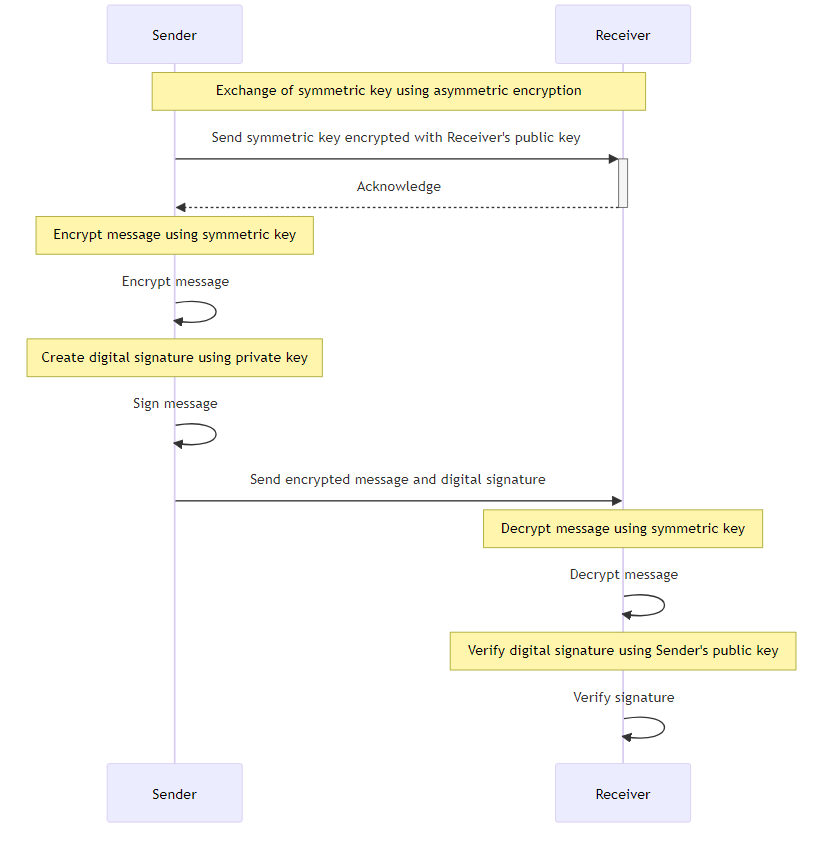

### Example: Modulo Hash Algorithm:
The Modulo Hash algorithm takes a string input and converts it into a fixed-size integer output (hash value) using the following steps:

1. Initialize a hash value variable to 0.
2. For each character in the input string:
   1. Convert the character to its ASCII code.
   2. Multiply the current hash value by a prime number (e.g., 31).
   3. Add the ASCII code to the hash value.
3. Take the modulo of the final hash value with a large prime number (e.g., 1,000,003) to ensure a fixed-size output.

Here's a Python implementation of the Modulo Hash algorithm:

In [ ]:
def modulo_hash(input_string):
    hash_value = 0
    prime_multiplier = 31
    modulo_prime = 1000003

    for char in input_string:
        ascii_code = ord(char)
        hash_value = (hash_value * prime_multiplier + ascii_code) % modulo_prime

    return hash_value

In [ ]:
## Test code
test_cases = [
    "Cybersecurity",
    "Claude Shannon, an American mathematician, is known as the father of information theory.",
    "Whitfield Diffie and Martin Hellman invented the Diffie-Hellman key exchange, a method for securely exchanging cryptographic keys over a public channel.",
    "The CIA triad - Confidentiality, Integrity, and Availability - forms the foundation of information security principles.",
    "Bruce Schneier is a renowned cryptographer and computer security professional who has authored several books on cryptography and cybersecurity.",
    "Cryptography is the practice of securing communication and data using mathematical algorithms to encrypt and decrypt information, ensuring confidentiality, integrity, and authentication in the digital world.",
    "Cybersecurity"
    ""
]

for test_case in test_cases:
    print(f"Input: {test_case}")
    print(f"Modulo Hash: {modulo_hash(test_case)}")
    print()

Input: Cybersecurity
Modulo Hash: 108041

Input: Claude Shannon, an American mathematician, is known as the father of information theory.
Modulo Hash: 594456

Input: Whitfield Diffie and Martin Hellman invented the Diffie-Hellman key exchange, a method for securely exchanging cryptographic keys over a public channel.
Modulo Hash: 614529

Input: The CIA triad - Confidentiality, Integrity, and Availability - forms the foundation of information security principles.
Modulo Hash: 813014

Input: Bruce Schneier is a renowned cryptographer and computer security professional who has authored several books on cryptography and cybersecurity.
Modulo Hash: 557862

Input: Cryptography is the practice of securing communication and data using mathematical algorithms to encrypt and decrypt information, ensuring confidentiality, integrity, and authentication in the digital world.
Modulo Hash: 486927

Input: Cybersecurity
Modulo Hash: 108041



As you can see, each input string produces a unique fixed-size integer output (hash value). The Modulo Hash algorithm achieves this by combining the ASCII codes of the characters in the input string using multiplication and addition, and then taking the modulo of the result with a large prime number.

The key properties of the Modulo Hash algorithm are:

1.  Deterministic -- The same input string always produces the same hash value.
2.  Fixed-size output -- Regardless of the length of the input string, the hash value is always a fixed-size integer.
3.  Uniformity -- The hash values are uniformly distributed across the range of possible outputs.

However, it's important to note that the Modulo Hash algorithm, as presented here, is a simplified example and not suitable for cryptographic purposes. Cryptographic hash functions, such as SHA-256 and MD5, have additional properties like collision resistance and preimage resistance, which make them more secure for applications like digital signatures and password storage.

### Exercise: Simp;le Hash Function - "Chaos Emerald Hash"
Implement a simple hash function that converts input strings into fixed-length hash values between 0 and 999. Instructions:

1. Create a function named chaos_emerald_hash that takes a single argument, input_string.
2. Initialize a variable hash_value to 0.
3. For each character in input_string:
  1. Convert the character to its Unicode integer value using the ord() function.
  2. Add the integer value to hash_value.
4. Calculate the remainder of hash_value divided by 1000. This will be the final hash value.
Return the final hash value.

In [ ]:
def chaos_emerald_hash(input_string):
    # Your implementation here
    return 0 # you'll replace this

print(chaos_emerald_hash("Sonic"))  # Should Output: 508`

## Who Wants Your Data? How Can You Protect It?

In today's digital age, our personal information has become a valuable commodity. From financial records and healthcare data to social media profiles and online behavior, the data we generate and store online is of great interest to a wide range of actors, both benign and malicious. In this section, we will explore the different types of threat actors who may be interested in your data and discuss practical methods you can use to protect your information from unauthorized access.

Some common types of **threat actors** include:

1. **Cybercriminals** are individuals or groups seek to exploit your personal information for financial gain. They may attempt to steal your credit card numbers, bank account details, or identity information to commit fraud, sell your data on the dark web, or extort money through ransomware attacks.

2. **Hacktivists** are motivated by political or social causes, hacktivists target individuals, nations, or organizations to expose perceived wrongdoings, push their agenda, or disrupt operations. They may seek to access your data to embarrass or discredit you or to use your information to further their cause.

3.  Governments and state-sponsored actors--**Advanced Persistent Threats**--may be interested in your data for espionage, surveillance, or strategic purposes. They may target individuals with access to sensitive information, such as government employees, journalists, or activists, to gather intelligence or influence political outcomes (such as the way you vote).

4. While not necessarily malicious, advertisers and data brokers collect and analyze vast amounts of personal data to build detailed profiles of individuals for targeted advertising and marketing purposes. They may track your online behavior, purchases, and interests to personalize ads and content, sometimes at the expense of your privacy. Once they have this data, they may *themselves* be hacked, which will lead to your information being exposed.

5. Employees, contractors, or business partners with legitimate access to your data may misuse their privileges for personal gain or malicious purposes. Such **insider threats** can be particularly challenging to detect and prevent, as they often have valid credentials and knowledge of an organization's systems and procedures.



### Methods to Protect Your Data
There is no single, foolproof method to protect your data. Instead, you need to use what cybersecurity professionals call **defense in depth**, which means using a series of protections, so that the breakdown of any single defense doesn't lead to catastrophe.

1. Be mindful of the source of your hardware, software, and apps:

 - Purchase devices and components from reputable manufacturers and suppliers to reduce the risk of pre-installed malware or hardware-based vulnerabilities.

 - Download software and apps only from official app stores or trusted sources to minimize the chance of installing malicious or counterfeit programs.

 - Be cautious of free software or apps from unknown developers, as they may contain hidden malware or adware.

2. Keep your software and operating systems up to date:

 - Enable automatic updates for your operating system, web browsers, and other critical software to ensure you have the latest security patches and bug fixes.

 - Regularly check for and install updates for all your apps and programs, as outdated software may contain known vulnerabilities that can be exploited by attackers.

3. Use strong, unique passwords:

 - Create strong passwords that cannot easily be guessed or "cracked". A popular method is to use **four random words** that are easy for you to remember but difficult for others to guess. (Such passwords have high **information entropy**, meaning they are very difficult to guess or crack).

 - Use a different password for each online account to limit the impact of a single password breach. Consider using a password manager to generate and store complex passwords securely.

 - Avoid using easily guessable information, such as birthdays, pet names, or common words, in your passwords.

4. Enable two-factor authentication (2FA):

 - Activate 2FA whenever possible, especially for sensitive accounts like email, banking, and social media. 2FA adds an extra layer of security by requiring a second form of verification, such as a code sent to your phone or generated by an app, in addition to your password.

 - Use hardware security keys or authenticator apps for 2FA instead of SMS-based verification, as SMS can be vulnerable to interception and SIM swapping attacks.

5. Be cautious of phishing and social engineering attempts:

 - Be wary of unsolicited emails, messages, or phone calls asking for personal information or urging you to click on suspicious links or attachments.

 - Verify the identity of the sender and the legitimacy of the request before providing any sensitive information or taking any action.

 - Educate yourself and your family members about common phishing tactics and how to spot and avoid them.

6. Encrypt your data and communications:

 - Use encryption tools to protect sensitive data stored on your devices, such as full-disk encryption for your computer or phone.

 - Encrypt your online communications using secure protocols like HTTPS, SSL/TLS, or VPNs, especially when using public Wi-Fi networks.

 - Consider using end-to-end encrypted messaging apps, like Signal or WhatsApp, for sensitive conversations.

7. Regularly back up your data:

 - Create regular backups of your important files, documents, and media to protect against data loss due to hardware failure, malware, or ransomware attacks.

 - Store backups on external drives or in the cloud, and ensure they are encrypted and stored securely.

By understanding the different types of threat actors and implementing these practical data protection methods, you can significantly reduce the risk of your personal information falling into the wrong hands. However, it's essential to remember that no single measure is foolproof, and a multi-layered approach to data security is always recommended. Stay informed about the latest security best practices, and remain vigilant in protecting your data in an ever-evolving digital landscape.

## Review With Quizlet

In [ ]:
%%html
<iframe src="https://quizlet.com/820923558/learn/embed?i=psvlh&x=1jj1" height="500" width="100%" style="border:0"></iframe>

## Glossary

| Term | Definition |
| --- | --- |
| *Fundamental Concepts* |  |
| Information | Data that has meaning, context, or purpose. |
| Information Security | The practice of protecting data from unauthorized access, use, disclosure, disruption, modification, or destruction. |
| CIA Triad | A model that defines the three key principles of information security: Confidentiality, Integrity, and Availability. |
| Confidentiality | The principle of ensuring that data is accessible only to authorized parties. |
| Integrity | The principle of maintaining the accuracy and consistency of data throughout its lifecycle. |
| Availability | The principle of ensuring that data and systems are accessible and operational when needed by authorized users. |
| Redundancy (Planned) | The incorporation of additional components or systems to maintain functionality in case of failure or damage. |
| Defense in Depth | A multi-layered approach to security that combines multiple defensive mechanisms to protect against various threats. |
| *Cryptography* |  |
| Key | A piece of information used to encrypt or decrypt data in a cryptographic algorithm. |
| Symmetric Encryption | A type of encryption where the same key is used for both encrypting and decrypting data. |
| Asymmetric Encryption | A type of encryption that uses two different keys: a public key for encryption and a private key for decryption. |
| Caesar Cipher | A simple substitution cipher that shifts each letter in the plaintext by a fixed number of positions in the alphabet. |
| Vigenère Cipher | A polyalphabetic substitution cipher that uses a keyword to encrypt the plaintext, providing more security than simple substitution ciphers. |
| Kerckhoffs's principle | The concept that the security of a cryptographic system should depend on the secrecy of the key, not the secrecy of the algorithm. |
| RSA | A widely-used asymmetric encryption algorithm named after its inventors: Rivest, Shamir, and Adleman. |
| AES | The Advanced Encryption Standard, a symmetric encryption algorithm widely used for securing sensitive data. |
| *Hashing and Digital Signatures* |  |
| Hashing | The process of converting data of any size into a fixed-size output (hash value) using a mathematical algorithm. |
| Digital Signature | A cryptographic technique that ensures the authenticity, integrity, and non-repudiation of digital communications. |
| SHA | Secure Hash Algorithm, a family of cryptographic hash functions used for data integrity and digital signatures. |
| *Attacks and Vulnerabilities* |  |
| Brute Force Attack | An attack method that involves systematically trying all possible keys or passwords until the correct one is found. |
| Frequency Analysis | A technique used to break simple substitution ciphers by analyzing the frequency of letters or symbols in the ciphertext. |
| Known Plaintext Attack | An attack where the attacker has access to both the plaintext and its corresponding ciphertext, aiding in determining the encryption key. |
| Malware | Software designed to harm, disrupt, or gain unauthorized access to a computer system. |
| Virus | A type of malware that replicates itself by modifying other computer programs and spreading from one computer to another. |
| Denial of Service | An attack that aims to make a system or network unavailable to its intended users by overwhelming it with traffic or requests. |
| Phishing | A social engineering attack that attempts to trick individuals into revealing sensitive information or clicking on malicious links. |
| Social Engineering | The psychological manipulation of people into performing actions or divulging confidential information. |
| Advanced Persistent Threat | A sophisticated, prolonged cyberattack in which an intruder gains unauthorized access to a network and remains undetected for an extended period. |
| *Best Practices and Solutions* |  |
| Two-Factor Authentication (2FA) | An extra layer of security that requires a second form of verification, such as a code sent to a phone, in addition to a password. |
| Four Random Words | A method for creating strong, memorable passphrases by combining four randomly chosen words. |
| HTTPS | Hypertext Transfer Protocol Secure, a protocol for secure communication over the internet using SSL/TLS encryption. |
| Information Entropy | A measure of the uncertainty or randomness in a piece of data, often used to assess the strength of passwords or encryption keys. |
